In [1]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(boston.DESCR)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibil

In [3]:
# In order to do computations easily, pandas is used.
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
# data preprocessing: 16 data points have an 'MEDV' value of 50.0. 
df = df[df.MEDV != 50]

In [4]:
### independent variable's correlation with target variable 
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
print(corr_with_target)

CRIM      -0.450115
ZN         0.404608
INDUS     -0.600005
CHAS       0.074803
NOX       -0.524451
RM         0.686634
AGE       -0.492915
DIS        0.368813
RAD       -0.476296
TAX       -0.572442
PTRATIO   -0.518641
B          0.364928
LSTAT     -0.759837
Name: MEDV, dtype: float64


c:\anaconda3\anaconda3_2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [5]:
attrs = pearson.iloc[:-1,:-1] # all except target
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

c:\anaconda3\anaconda3_2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,attribute pair,correlation
22,"(RAD, TAX)",0.909000
5,"(DIS, NOX)",-0.768122
12,"(INDUS, NOX)",0.765155
7,"(AGE, DIS)",-0.743043
17,"(AGE, NOX)",0.727671
10,"(INDUS, TAX)",0.717678
11,"(DIS, INDUS)",-0.710284
15,"(DIS, ZN)",0.673227
16,"(NOX, TAX)",0.667380
19,"(AGE, INDUS)",0.637970


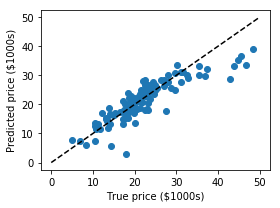

Linear Regression MSE: 15.9025


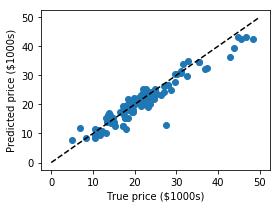

Gradient Boosting Method MSE: 6.5763


In [8]:
# randomize the dataset
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.25, random_state=14)

# linear regression 
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.show()

mse = mean_squared_error(expected, predicted)
print("Linear Regression MSE: %.4f" % mse)

# Gradient Boosting Method 
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.show()

mse = mean_squared_error(expected, predicted)
print("Gradient Boosting Method MSE: %.4f" % mse)

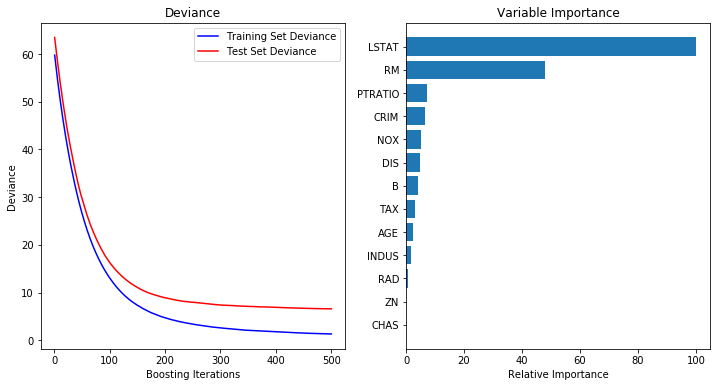

In [9]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

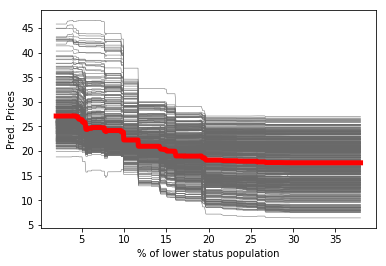

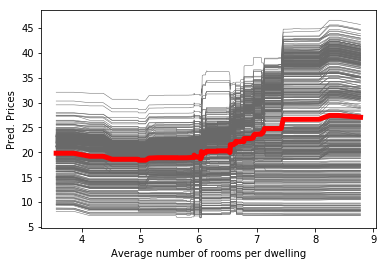

In [10]:
from pycebox.ice import ice, ice_plot
lstat_ice_df = ice(data=features, column='LSTAT', predict=clf.predict)

ice_plot(lstat_ice_df, linewidth=.5, c='dimgray',plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5})

plt.ylabel('Pred. Prices')
plt.xlabel('% of lower status population')

rm_ice_df = ice(data=features, column='RM', predict=clf.predict)
ice_plot(rm_ice_df, linewidth=.5, c='dimgray',plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5})
plt.ylabel('Pred. Prices')
plt.xlabel('Average number of rooms per dwelling')

plt.show()